In [476]:
#Team Name: Super Mario
#Dataset: Nobel Prizes
#
#
#Overview & Motivation:
#----------------------
#Our dataset is a dataset containg a set of Nobel Prizes with the corresponding winners and some data about them.
#By first inspecting the dataset in excel, we found that our main goal is to clear the huge number of null values and then
#come up with some questions to analyze this dataset and extract some info from it. We will also add some visualizations to
#show the relations between some attrbutes.
#
#Related Work:
#-------------
#The solved examples and practice assignments supported in the class were very helpful. Also, Google search.
#
#Initial Questions:
#------------------
#What does this dataset tell us? What methods will we use to clear the null values in the dataset? What visualizations will
#strongly represent our data? What are the challenges are we going to face? What questions are we going to ask our dataset?
#
#Data:
#-----
#Our data sourde is the .csv file called 'archive.csv'. The Nobel laureate data was acquired from the Nobel Prize API.
#Cleaning up methods mainly focused on getting values from other columns and putting them in the null values.
#
#Exploratory Data Analysis:
#--------------------------
#To explore the data, we mainly focused on frequently checking the datasets through the excel file, printing the dataset,
#and using some visualizations. All our focus is to find a relation between the columns/rows of the dataset to replace the
#null values and clean the dataset to get real answers. The challenge we faced is that most of the columns had string
#datatypes, so imputation was almost impossible. Also, string manipulation for each value will rewuire a lot of work and
#will require another datasets. For example, string manipulation of citites and countries names, which is explained below
#in other parts in the notebook. This is why there are null values that are replaced with 'Not Available' or 'Not Required'
#
#Final Analysis:
#---------------
#A final analysis of the dataset is that it contains some columns that are redundunt, such as 'Birth City' and 'Birth
# Country', which could be merged in one column 'City, Country' and be written in some format. Another conclusion is that
#since the majority of the data are individuals, this led to multiple null values in the 'Organization Name','Organization
# City','Organization Country' columns. Also, since most of the data are not numerical, it is hard to use imputation in
#replacing null values in this dataset. A solution for that is to re-design the dataset columns.
#Methods used to answered the questions were visualizations, filtering, and for loops. The explanation of each question and
#their answer is explained below in the notebook.

In [477]:
#Importing the important libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [478]:
#Reading the .csv data file into a daaframe using the pd.read_csv() function in pandas
df = pd.read_csv("archive.csv")

#Column Names In Our Dataset:
#----------------------------
#Year : The year that this noble prize was awarded
#Category : Physics, Medicine, ... etc
#Prize : Prize Title
#Motivation : Reason For This Nobel Prize
#Prize Share : Value Indicating If This Prize Was Shared Among More Than One Individual/Organization
#Laureate ID : Prize ID
#Laureate Type : Individual/Organization
#Full Name : Full name of the recipient
#Birth Date : Birth date of the recipient
#Birth City : Birth city of the recipient
#Birth Country : Birth country of the recipient
#Sex : Sex of the recipient
#Organization Name
#Organization City
#Organization Country
#Death Date : Death date of the recipient
#Death City : Death city of the recipient
#Death Country : Death Country of the recipient

#Displaying all the info about the dataframe we have now; to explore all the datatypes, total number of rows, null
#and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
Year                    969 non-null int64
Category                969 non-null object
Prize                   969 non-null object
Motivation              881 non-null object
Prize Share             969 non-null object
Laureate ID             969 non-null int64
Laureate Type           969 non-null object
Full Name               969 non-null object
Birth Date              940 non-null object
Birth City              941 non-null object
Birth Country           943 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization City       716 non-null object
Organization Country    716 non-null object
Death Date              617 non-null object
Death City              599 non-null object
Death Country           605 non-null object
dtypes: int64(2), object(16)
memory usage: 75.7+ KB


In [479]:
#Checking the locations of null values:
# True means that this value is null
# False means that this value is not null
df.isnull()

#From the shown table below we see that there are multiple null values in different values, but let's find a relation to
#see where most of the null values occur

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False


In [480]:
# get the number of missing data points per column
missing_values = df.isnull().sum()

# look at the number of missing points in each column
print(missing_values)

#We can now see which columns contain null values and their count in each column
#Let's start removing the null values in each column

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64


In [481]:
#Starting with the 'Motivation' column
#Motivation contains the reason for winning this prize
#For Example "in recognition of the extraordinary services he has rendered by the discovery of the remarkable rays 
#subsequently named after him"

#One possible solution is removing null values in 'Motivation' column by replacing it with corresponding categories
for i in range (df.shape[0]):
    if(pd.isnull(df.at[i,'Motivation'])):
        category = df.at[i,'Category']
        df.at[i,'Motivation'] = "in his/her extraordinary efforts in the field of " + category
        
#Printing the 'Motivation' column
df[['Year','Motivation']]

,Year,Motivation
0,1901,"""in recognition of the extraordinary services ..."
1,1901,"""in special recognition of his poetic composit..."
2,1901,"""for his work on serum therapy, especially its..."
3,1901,in his/her extraordinary efforts in the field ...
4,1901,in his/her extraordinary efforts in the field ...
5,1901,"""in recognition of the extraordinary services ..."
6,1902,"""in recognition of the extraordinary services ..."
7,1902,"""the greatest living master of the art of hist..."
8,1902,"""for his work on malaria, by which he has show..."
9,1902,in his/her extraordinary efforts in the field ...


In [482]:
#Let's see if the 'Motivation' column still contains any null values
missing_values = df.isnull().sum()
print(missing_values)

#So, it is obvious from the numbers below that there is no more null values in 'Motivation' column
#Let's move on to the second column

Year                      0
Category                  0
Prize                     0
Motivation                0
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64


In [483]:
#Removing null values in 'Birth Date', 'Birth City', 'Birth Country' columns  by replacing the birth Date by a year before 
#the nobel prize year

#The null values in 'Birth Date' column for organizations is replaced by a string saying that it this organization started 
#before the year it got the nobel prize, which is obvious
#The null values in 'Birth City' column for organizations is replaced by a string saying that it is an organization so it 
#is has no birth city
#The null values in 'Birth Country' column for organizations is replaced by a string saying that it is an organization so it
#is has no birth ountry

#The null values in 'Birth Date' column for individuals is replaced by a string saying that this individual was born 
#before the year it got the nobel prize, which is obvious
#The null values in 'Birth City' column for individuals is replaced by a string saying that it is not available
#The null values in 'Birth Country' column for individuals is replaced by a string saying that it is not available

for i in range (df.shape[0]):
    year = df.at[i,'Year']
    laureate = df.at[i, 'Laureate Type']
    if(laureate == "Organization"):
        if(pd.isnull(df.at[i,'Birth Date'])):
            df.at[i,'Birth Date'] = "Started Before " + str(year)
        if(pd.isnull(df.at[i,'Birth City'])):
            df.at[i,'Birth City'] = "Organization/No Birth City"
        if(pd.isnull(df.at[i,'Birth Country'])):
            df.at[i,'Birth Country'] = "Organization/No Birth Country"
    if(laureate == "Individual"):
        if(pd.isnull(df.at[i,'Birth Date'])):
            df.at[i,'Birth Date'] = "Born Before " + str(year)      
        if(pd.isnull(df.at[i,'Birth City'])):
            df.at[i,'Birth City'] = "Not Available"
        if(pd.isnull(df.at[i,'Birth Country'])):
            df.at[i,'Birth Country'] = "Not Available" 

#Printing 'Birth Date','Birth City','Birth Country' Columns
df[['Year','Birth Date','Birth City','Birth Country']]

#It is obvious from the data below that there is no more null values in these three columns

,Year,Birth Date,Birth City,Birth Country
0,1901,1852-08-30,Rotterdam,Netherlands
1,1901,1839-03-16,Paris,France
2,1901,1854-03-15,Hansdorf (Lawice),Prussia (Poland)
3,1901,1828-05-08,Geneva,Switzerland
4,1901,1822-05-20,Paris,France
5,1901,1845-03-27,Lennep (Remscheid),Prussia (Germany)
6,1902,1852-10-09,Euskirchen,Prussia (Germany)
7,1902,1817-11-30,Garding,Schleswig (Germany)
8,1902,1857-05-13,Almora,India
9,1902,1833-02-19,Geneva,Switzerland


In [484]:
#Let's see if the 'Birth Date','Birth City', 'Birth Country' columns still contain any null values
missing_values = df.isnull().sum()
print(missing_values)

#So, it is obvious from the numbers below that there is no more null values in the three columns
#Let's move on to the next column

Year                      0
Category                  0
Prize                     0
Motivation                0
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date                0
Birth City                0
Birth Country             0
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64


In [485]:
#The next column to work with is the 'Sex' column
#But let's first inspect where the null values at 'Sex' column are located, because organizatons shouldn't have sex
#So, let's print the 'Laureate Type' and 'Sex' columns and inspect the data
#df[['Laureate Type','Sex']]
organizations = df[df['Laureate Type']=="Organization"]
print(organizations.shape)
print(organizations.isnull().sum())
organizations

#From the printed values we can conclude the following:
# 1) Total null values in 'Sex' column in the whole dataset were 26 values
# 2) Total null values in 'Sex' column in organizations were 26 values
# 3) Some values in the 'Sex' column in organizations were assigned to either Male or Female, which is wrong

#So, let's see an approach to clean this column

(30, 18)
Year                     0
Category                 0
Prize                    0
Motivation               0
Prize Share              0
Laureate ID              0
Laureate Type            0
Full Name                0
Birth Date               0
Birth City               0
Birth Country            0
Sex                     26
Organization Name       30
Organization City       30
Organization Country    30
Death Date              28
Death City              28
Death Country           28
dtype: int64


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
24,1904,Peace,The Nobel Peace Prize 1904,in his/her extraordinary efforts in the field ...,1/1,467,Organization,Institut de droit international (Institute of ...,Started Before 1904,Organization/No Birth City,Organization/No Birth Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,in his/her extraordinary efforts in the field ...,1/1,477,Organization,Bureau international permanent de la Paix (Per...,Started Before 1910,Organization/No Birth City,Organization/No Birth Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,in his/her extraordinary efforts in the field ...,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,Started Before 1917,Organization/No Birth City,Organization/No Birth Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,in his/her extraordinary efforts in the field ...,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,Started Before 1938,Organization/No Birth City,Organization/No Birth Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,1944,Peace,The Nobel Peace Prize 1944,in his/her extraordinary efforts in the field ...,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,Started Before 1944,Organization/No Birth City,Organization/No Birth Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,1947,Peace,The Nobel Peace Prize 1947,in his/her extraordinary efforts in the field ...,1/2,508,Organization,Friends Service Council (The Quakers),Started Before 1947,Organization/No Birth City,Organization/No Birth Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,1947,Peace,The Nobel Peace Prize 1947,in his/her extraordinary efforts in the field ...,1/2,509,Organization,American Friends Service Committee (The Quakers),Started Before 1947,Organization/No Birth City,Organization/No Birth Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,1954,Peace,The Nobel Peace Prize 1954,in his/her extraordinary efforts in the field ...,1/1,515,Organization,Office of the United Nations High Commissioner...,Started Before 1954,Organization/No Birth City,Organization/No Birth Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,1963,Peace,The Nobel Peace Prize 1963,in his/her extraordinary efforts in the field ...,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,Started Before 1963,Organization/No Birth City,Organization/No Birth Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,1963,Peace,The Nobel Peace Prize 1963,in his/her extraordinary efforts in the field ...,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,Started Before 1963,Organization/No Birth City,Organization/No Birth Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [486]:
#Our approach here is that since there is no null values for the 'Sex' column for individuals, then we will simply assign
#the 'Sex' column value for all organizations to be 'No Sex For Organizations'

for i in range (df.shape[0]):
    laureate = df.at[i, 'Laureate Type']
    if(laureate == "Organization"):
        df.at[i,'Sex'] = "No Sex For Organization"
    
#Printing all organziations
df[df['Laureate Type']=="Organization"]

#We can now see that the 'Sex' column has been modified for all organization, i.e. for the whole dataset

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
24,1904,Peace,The Nobel Peace Prize 1904,in his/her extraordinary efforts in the field ...,1/1,467,Organization,Institut de droit international (Institute of ...,Started Before 1904,Organization/No Birth City,Organization/No Birth Country,No Sex For Organization,NaN,NaN,NaN,NaN,NaN,NaN
61,1910,Peace,The Nobel Peace Prize 1910,in his/her extraordinary efforts in the field ...,1/1,477,Organization,Bureau international permanent de la Paix (Per...,Started Before 1910,Organization/No Birth City,Organization/No Birth Country,No Sex For Organization,NaN,NaN,NaN,NaN,NaN,NaN
90,1917,Peace,The Nobel Peace Prize 1917,in his/her extraordinary efforts in the field ...,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,Started Before 1917,Organization/No Birth City,Organization/No Birth Country,No Sex For Organization,NaN,NaN,NaN,NaN,NaN,NaN
206,1938,Peace,The Nobel Peace Prize 1938,in his/her extraordinary efforts in the field ...,1/1,503,Organization,Office international Nansen pour les Réfugiés ...,Started Before 1938,Organization/No Birth City,Organization/No Birth Country,No Sex For Organization,NaN,NaN,NaN,NaN,NaN,NaN
222,1944,Peace,The Nobel Peace Prize 1944,in his/her extraordinary efforts in the field ...,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,Started Before 1944,Organization/No Birth City,Organization/No Birth Country,No Sex For Organization,NaN,NaN,NaN,NaN,NaN,NaN
244,1947,Peace,The Nobel Peace Prize 1947,in his/her extraordinary efforts in the field ...,1/2,508,Organization,Friends Service Council (The Quakers),Started Before 1947,Organization/No Birth City,Organization/No Birth Country,No Sex For Organization,NaN,NaN,NaN,NaN,NaN,NaN
245,1947,Peace,The Nobel Peace Prize 1947,in his/her extraordinary efforts in the field ...,1/2,509,Organization,American Friends Service Committee (The Quakers),Started Before 1947,Organization/No Birth City,Organization/No Birth Country,No Sex For Organization,NaN,NaN,NaN,NaN,NaN,NaN
295,1954,Peace,The Nobel Peace Prize 1954,in his/her extraordinary efforts in the field ...,1/1,515,Organization,Office of the United Nations High Commissioner...,Started Before 1954,Organization/No Birth City,Organization/No Birth Country,No Sex For Organization,NaN,NaN,NaN,NaN,NaN,NaN
365,1963,Peace,The Nobel Peace Prize 1963,in his/her extraordinary efforts in the field ...,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,Started Before 1963,Organization/No Birth City,Organization/No Birth Country,No Sex For Organization,NaN,NaN,NaN,NaN,NaN,NaN
366,1963,Peace,The Nobel Peace Prize 1963,in his/her extraordinary efforts in the field ...,1/2,523,Organization,Ligue des Sociétés de la Croix-Rouge (League o...,Started Before 1963,Organization/No Birth City,Organization/No Birth Country,No Sex For Organization,NaN,NaN,NaN,NaN,NaN,NaN


In [487]:
#Let's check if the 'Sex' column still contains any null values
missing_values = df.isnull().sum()
print(missing_values)

#So, it is obvious from the numbers below that there is no more null values in the 'Sex' column
#Let's move on to the next column

Year                      0
Category                  0
Prize                     0
Motivation                0
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date                0
Birth City                0
Birth Country             0
Sex                       0
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64


In [488]:
#The next three columns that we will be working on are 'Organization Name', 'Organization City', 'Organization Country'
#It is obvious from the names of three columns that these columns are related to organiztions only,
#or individuals whoe are related to organizations
#And since there are only 30 organizations in our dataset, then the missing values will be because of on of the following:
# 1) An individual who is not related to an organization
# 2) An organization whose name is missing

#First, handling the 'Organization Name' column
#The approach we took here is that :
# 1) If the laureate was an individual, we will replace the null value in this column with 'Individual'
# 2) If the laureate was an organization, we wil replace the null values with the value in the 'Full Name' column, since
# there is no missing/null values in the 'Full Name' column

#Second, handLing the 'Organization City' column
#The approach we took is that :
# 1) If the laureate was an indivual who is related to an organziation, we will replace the null value in this column by
# his/her birth city, assuming that the laureate and the related organization started in the same city
# 2) If the laureate was an individual who is not related to an organization, we will just replace the null value in this
# column with "Individual"
# 3) If the laureate was an organization, we will just replace the null value with 'Missing'

#Thirdly, handling the 'Organization Country' column
#The approach we took is that :
# 1) If the laureate was an indivual who is related to an organziation, we will replace the null value in this column by
# his/her birth country, assuming that the laureate and the related organization started in the same country
# 2) If the laureate was an individual who is not related to an organization, we will just replace the null value in this
# column with "Individual"
# 3) If the laureate was an organization, we will just replace the null value with 'Missing'

#For both the 'Organization City' and 'Organization Country' columns, the null values can be filled in a smarter way by
#extracting these information from the 'Organization Name' column, but this requires complicated string manipulation and a 
#dataset containg all citites in the world and their corresponding countries. Also, it requires that all organization names
#are written in the same format. For example, 'German University in Cairo, Cairo, Egypt'.
#Also, we might face on of the following:
# 1) Spelling mistakes in the cities or countries (i.e. Los Angeles and Los Angelos)
# 2) Cities or countries are written in abbreviated form (i.e. NY or NYC or New York City, USA or United States of America
# All these cases must be handled, which is impossible
# 3) Some names may not be written in the same format.

for i in range (df.shape[0]):
    laureate = df.at[i, 'Laureate Type']
    FullName = df.at[i,'Full Name']
    BirthCity = df.at[i,'Birth City']
    BirthCountry= df.at[i,'Birth Country']
    #print(laureate)
    if(laureate == "Organization"):
        if(pd.isnull(df.at[i,'Organization Name'])):
            df.at[i,'Organization Name'] = FullName
        if(pd.isnull(df.at[i,'Organization City'])):
            df.at[i,'Organization City'] = "Missing"
        if(pd.isnull(df.at[i,'Organization Country'])):
            df.at[i,'Organization Country'] = "Missing"
    if(laureate == "Individual"):
        if(pd.isnull(df.at[i,'Organization Name'])):
            df.at[i,'Organization Name'] = "Individual"  
        if(pd.isnull(df.at[i,'Organization City']) and str(df.at[i, 'Organization Name']) == "Individual"):
            df.at[i,'Organization City'] = "Individual"
        if(pd.isnull(df.at[i,'Organization City']) and not str(df.at[i, 'Organization Name']) == "Individual"):
            df.at[i,'Organization City'] = BirthCity
        if(pd.isnull(df.at[i,'Organization Country']) and str(df.at[i, 'Organization Name']) == "Individual"):
            df.at[i,'Organization Country'] = "Individual"
        if(pd.isnull(df.at[i,'Organization Country']) and not str(df.at[i, 'Organization Name']) == "Individual"):
            df.at[i,'Organization Country'] = BirthCountry

#Printing 'Organization Name','Organization City','Organization Country' Columns
df[['Year','Laureate Type','Organization Name','Organization City','Organization Country']]

#We can see now that from the data shown below that all the null values in the three columns have been modified

,Year,Laureate Type,Organization Name,Organization City,Organization Country
0,1901,Individual,Berlin University,Berlin,Germany
1,1901,Individual,Individual,Individual,Individual
2,1901,Individual,Marburg University,Marburg,Germany
3,1901,Individual,Individual,Individual,Individual
4,1901,Individual,Individual,Individual,Individual
5,1901,Individual,Munich University,Munich,Germany
6,1902,Individual,Berlin University,Berlin,Germany
7,1902,Individual,Individual,Individual,Individual
8,1902,Individual,University College,Liverpool,United Kingdom
9,1902,Individual,Individual,Individual,Individual


In [489]:
#Let's check if the 'Organization Name','Organization City','Organization Country' columns still contain any null values
missing_values = df.isnull().sum()
print(missing_values)

#So, it is obvious from the numbers below that there is no more null values in these three columns column
#Let's move on to the next column

Year                      0
Category                  0
Prize                     0
Motivation                0
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date                0
Birth City                0
Birth Country             0
Sex                       0
Organization Name         0
Organization City         0
Organization Country      0
Death Date              352
Death City              370
Death Country           364
dtype: int64


In [490]:
#Finally, moving on to the last three columns 'Death Date','Death City','Death Country'

#The approach we took to replace the null values is that:
#-------------------------------------------------------
# 1) If the laureate was an organization, and it has none of these values, so we will replace it with "Not Available". Of 
# course if one of these organizations is closed, we should have a closing date for it but there is no source to get this
# information from. If one of the columns 'Death City' or 'Death Country' has a non-null value, we will replace the null 
# value in 'Death Date' with a date that is after the date this organization got the prize, which is obvious. If the death
# date is available, then we will replace the null values in the other two columns with the values in the 'Organization
# City' and 'Organization Country', because sure the organization closed in the same city/country 

# 2) If the laureate was an individual and he/she has no death date, then this person is either still alive or this data is
# just missing. Also, there will be no values for the other two columns. We can make no assumptions that an individual is 
# dead or not unless we have death date. If one of the columns 'Death City' or 'Death Country' has a non-null value, we 
# will replace the null value in 'Death Date' with a date that is after the date this individual got the prize, which is 
# obvious. If the death date is not null and one of the other two columns has a null value, we will replace it with the 
# value in 'Birth City' or 'Birth Country'

count = 0
for i in range (df.shape[0]):
    year = df.at[i, 'Year']
    laureate = df.at[i, 'Laureate Type']
    BirthCity = df.at[i,'Birth City']
    BirthCountry= df.at[i,'Birth Country']
    OrganizationCity = df.at[i, 'Organization City']
    OrganizationCountry = df.at[i, 'Organization Country']
    if(laureate == "Organization"):
        if(pd.isnull(df.at[i,'Death Date']) and pd.isnull(df.at[i,'Death City']) and pd.isnull(df.at[i,'Death Country'])):
            df.at[i,'Death Date'] = "Not Available Or Still Going"
            df.at[i,'Death City'] = "Not Available Or Still Going"
            df.at[i,'Death Country'] = "Not Available Or Still Going"
        elif(pd.isnull(df.at[i,'Death Date']) and not pd.isnull(df.at[i,'Death City'])):
            df.at[i,'Death Date'] = "After " + str(year)
            if(pd.isnull(df.at[i,'Death Country'])):
                df.at[i, 'Death Country'] = OrganizationCountry
        elif(pd.isnull(df.at[i,'Death Date']) and not pd.isnull(df.at[i,'Death Country'])):
            df.at[i, 'Death Date'] = "After " + str(year)
            if(pd.isnull(df.at[i,'Death City'])):
                df.at[i, 'Death City'] = OrganizationCity
        elif(not pd.isnull(df.at[i,'Death Date'])):
            if(pd.isnull(df.at[i,'Death City'])):
                df.at[i, 'Death City'] = OrganizationCity
            if(pd.isnull(df.at[i,'Death Country'])):
                df.at[i, 'Death Country'] = OrganizationCountry
    elif(laureate == "Individual"):
        if(pd.isnull(df.at[i,'Death Date']) and pd.isnull(df.at[i,'Death City']) and pd.isnull(df.at[i,'Death Country'])):
            df.at[i,'Death Date'] = "Not Available Or Still Alive"
            df.at[i,'Death City'] = "Not Available Or Still Alive"
            df.at[i,'Death Country'] = "Not Available Or Still Alive"
        elif(pd.isnull(df.at[i,'Death Date']) and not pd.isnull(df.at[i,'Death City'])):
            df.at[i,'Death Date'] = "After " + str(year)
            if(pd.isnull(df.at[i,'Death Country'])):
                df.at[i, 'Death Country'] = BirthCountry
        elif(pd.isnull(df.at[i,'Death Date']) and not pd.isnull(df.at[i,'Death Country'])):
            df.at[i, 'Death Date'] = "After " + str(year)
            if(pd.isnull(df.at[i,'Death City'])):
                df.at[i, 'Death City'] = BirthCity
        elif(not pd.isnull(df.at[i,'Death Date'])):
            if(pd.isnull(df.at[i,'Death City'])):
                df.at[i, 'Death City'] = BirthCity
            if(pd.isnull(df.at[i,'Death Country'])):
                df.at[i, 'Death Country'] = BirthCountry
    
#print(df['Laureate Type' == "Organization"].count())
#df.query('Laureate Type == Organization', count)
#df[df['Laureate Type']=="Individual"]

#Printing 'Death Date','Death City','Death Country' Columns
df[['Year','Laureate Type','Death Date','Death City','Death Country']]

#From the data shown below, it is obvious that there is no more null values, and since the dataset is sorted according to
#prize year, the last rows show that most of the indivduals.organizations are alive/still going

,Year,Laureate Type,Death Date,Death City,Death Country
0,1901,Individual,1911-03-01,Berlin,Germany
1,1901,Individual,1907-09-07,Châtenay,France
2,1901,Individual,1917-03-31,Marburg,Germany
3,1901,Individual,1910-10-30,Heiden,Switzerland
4,1901,Individual,1912-06-12,Paris,France
5,1901,Individual,1923-02-10,Munich,Germany
6,1902,Individual,1919-07-15,Berlin,Germany
7,1902,Individual,1903-11-01,Charlottenburg,Germany
8,1902,Individual,1932-09-16,Putney Heath,United Kingdom
9,1902,Individual,1906-12-07,Bern,Switzerland


In [491]:
#Let's check if the 'Death Date','Death City','Death Country' columns still contain any null values
missing_values = df.isnull().sum()
print(missing_values)

#So, it is obvious from the numbers below that there is no more null values in our dataset !!
#FINALLYY !!
#Let's move on

Year                    0
Category                0
Prize                   0
Motivation              0
Prize Share             0
Laureate ID             0
Laureate Type           0
Full Name               0
Birth Date              0
Birth City              0
Birth Country           0
Sex                     0
Organization Name       0
Organization City       0
Organization Country    0
Death Date              0
Death City              0
Death Country           0
dtype: int64


In [492]:
# Now after cleaning all the null values in all columns, let's ask our dataset some questions and have some visualizations

In [493]:
#First of all let's see the dominance of USA in getting a Nobel prize

#Let's first prove it by numbers
print("By filtering on 'Organization Country' :")
print("----------------------------------------")
print(df['Organization Country'].value_counts())
print("      ")
print("=============================================================")
print("      ")
print("By filtering on 'Birth Country' :")
print("---------------------------------")
print(df['Birth Country'].value_counts())

#From The numbers below, it is clear that USA dominates the winning of Nobel prizes, whether by individuals, organizations,
#or individuals related to organizations

By filtering on 'Organization Country' :
----------------------------------------
United States of America               368
Individual                             212
United Kingdom                          92
Germany                                 53
France                                  41
Missing                                 30
Federal Republic of Germany             26
Switzerland                             22
Japan                                   18
Sweden                                  17
Netherlands                             11
Union of Soviet Socialist Republics     11
Denmark                                  9
Canada                                   7
Italy                                    7
Belgium                                  6
Austria                                  6
Australia                                6
Norway                                   5
Israel                                   5
Russia                                   3
Argentina      

In [494]:
#We can also prove it by displaying the filtered dataset
print(df[df['Organization Country']=="United States of America"].shape)
df[df['Organization Country']=="United States of America"]

(368, 18)


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
42,1907,Physics,The Nobel Prize in Physics 1907,"""for his optical precision instruments and the...",1/1,11,Individual,Albert Abraham Michelson,1852-12-19,Strelno (Strzelno),Prussia (Poland),Male,University of Chicago,"Chicago, IL",United States of America,1931-05-09,"Pasadena, CA",United States of America
72,1912,Medicine,The Nobel Prize in Physiology or Medicine 1912,"""in recognition of his work on vascular suture...",1/1,306,Individual,Alexis Carrel,1873-06-28,Sainte-Foy-lès-Lyon,France,Male,Rockefeller Institute for Medical Research,"New York, NY",United States of America,1944-11-05,Paris,France
80,1914,Chemistry,The Nobel Prize in Chemistry 1914,"""in recognition of his accurate determinations...",1/1,175,Individual,Theodore William Richards,1868-01-31,"Germantown, PA",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,1928-04-02,"Cambridge, MA",United States of America
118,1923,Physics,The Nobel Prize in Physics 1923,"""for his work on the elementary charge of elec...",1/1,28,Individual,Robert Andrews Millikan,1868-03-22,"Morrison, IL",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1953-12-19,"San Marino, CA",United States of America
139,1927,Physics,The Nobel Prize in Physics 1927,"""for his discovery of the effect named after him""",1/2,33,Individual,Arthur Holly Compton,1892-09-10,"Wooster, OH",United States of America,Male,University of Chicago,"Chicago, IL",United States of America,1962-03-15,"Berkeley, CA",United States of America
154,1930,Medicine,The Nobel Prize in Physiology or Medicine 1930,"""for his discovery of human blood groups""",1/1,321,Individual,Karl Landsteiner,1868-06-14,Vienna,Austrian Empire (Austria),Male,Rockefeller Institute for Medical Research,"New York, NY",United States of America,1943-06-26,"New York, NY",United States of America
164,1931,Peace,The Nobel Peace Prize 1931,in his/her extraordinary efforts in the field ...,1/2,497,Individual,Nicholas Murray Butler,1862-04-02,"Elizabeth, NJ",United States of America,Male,Columbia University,"New York, NY",United States of America,1947-12-07,"New York, NY",United States of America
165,1932,Chemistry,The Nobel Prize in Chemistry 1932,"""for his discoveries and investigations in sur...",1/1,191,Individual,Irving Langmuir,1881-01-31,"Brooklyn, NY",United States of America,Male,General Electric Company,"Schenectady, NY",United States of America,1957-08-16,"Falmouth, MA",United States of America
171,1933,Medicine,The Nobel Prize in Physiology or Medicine 1933,"""for his discoveries concerning the role playe...",1/1,325,Individual,Thomas Hunt Morgan,1866-09-25,"Lexington, KY",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1945-12-04,"Pasadena, CA",United States of America
175,1934,Chemistry,The Nobel Prize in Chemistry 1934,"""for his discovery of heavy hydrogen""",1/1,192,Individual,Harold Clayton Urey,1893-04-29,"Walkerton, IN",United States of America,Male,Columbia University,"New York, NY",United States of America,1981-01-05,"La Jolla, CA",United States of America


In [495]:
#We can also prove it by displaying the filtered dataset
print(df[df['Birth Country']=="United States of America"].shape)
df[df['Birth Country']=="United States of America"]

(276, 18)


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
35,1906,Peace,The Nobel Peace Prize 1906,in his/her extraordinary efforts in the field ...,1/1,470,Individual,Theodore Roosevelt,1858-10-27,"New York, NY",United States of America,Male,Individual,Individual,Individual,1919-01-06,"Oyster Bay, NY",United States of America
73,1912,Peace,The Nobel Peace Prize 1912,in his/her extraordinary efforts in the field ...,1/1,480,Individual,Elihu Root,1845-02-15,"Clinton, NY",United States of America,Male,Individual,Individual,Individual,1937-02-07,"New York, NY",United States of America
80,1914,Chemistry,The Nobel Prize in Chemistry 1914,"""in recognition of his accurate determinations...",1/1,175,Individual,Theodore William Richards,1868-01-31,"Germantown, PA",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,1928-04-02,"Cambridge, MA",United States of America
96,1919,Peace,The Nobel Peace Prize 1919,in his/her extraordinary efforts in the field ...,1/1,483,Individual,Thomas Woodrow Wilson,1856-12-28,"Staunton, VA",United States of America,Male,Individual,Individual,Individual,1924-02-03,"Washington, DC",United States of America
118,1923,Physics,The Nobel Prize in Physics 1923,"""for his work on the elementary charge of elec...",1/1,28,Individual,Robert Andrews Millikan,1868-03-22,"Morrison, IL",United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1953-12-19,"San Marino, CA",United States of America
125,1925,Peace,The Nobel Peace Prize 1925,in his/her extraordinary efforts in the field ...,1/2,489,Individual,Charles Gates Dawes,1865-08-27,"Marietta, OH",United States of America,Male,Individual,Individual,Individual,1951-04-23,"Evanston, IL",United States of America
139,1927,Physics,The Nobel Prize in Physics 1927,"""for his discovery of the effect named after him""",1/2,33,Individual,Arthur Holly Compton,1892-09-10,"Wooster, OH",United States of America,Male,University of Chicago,"Chicago, IL",United States of America,1962-03-15,"Berkeley, CA",United States of America
150,1929,Peace,The Nobel Peace Prize 1929,in his/her extraordinary efforts in the field ...,1/1,494,Individual,Frank Billings Kellogg,1856-12-22,"Potsdam, NY",United States of America,Male,Individual,Individual,Individual,1937-12-21,"St. Paul, MN",United States of America
153,1930,Literature,The Nobel Prize in Literature 1930,"""for his vigorous and graphic art of descripti...",1/1,603,Individual,Sinclair Lewis,1885-02-07,"Sauk Centre, MN",United States of America,Male,Individual,Individual,Individual,1951-01-10,Rome,Italy
163,1931,Peace,The Nobel Peace Prize 1931,in his/her extraordinary efforts in the field ...,1/2,496,Individual,Jane Addams,1860-09-06,"Cedarville, IL",United States of America,Female,Individual,Individual,Individual,1935-05-21,"Chicago, IL",United States of America


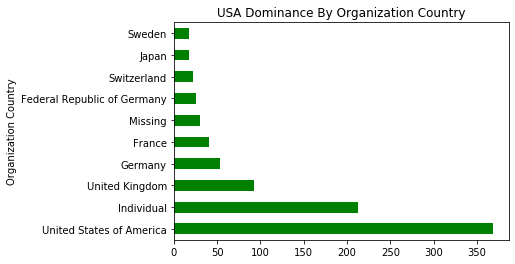

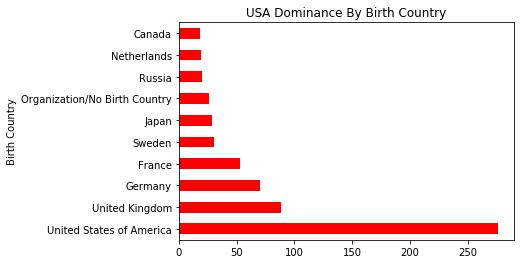

In [496]:
#Let's also prove it by graph
df['Organization Country'].value_counts()[:10].plot(kind='barh',color="green")
plt.ylabel("Organization Country")
plt.title("USA Dominance By Organization Country")
plt.show()
df['Birth Country'].value_counts()[:10].plot(kind='barh',color="red")
plt.ylabel("Birth Country")
plt.title("USA Dominance By Birth Country")
plt.show()

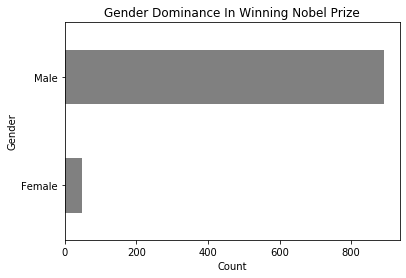

In [497]:
#Let's ask another question
#What is the gender of a typical Nobel prize winner ?!
#What is the ratio of males to females ?!

df.groupby(['Sex'])['Year'].count()[:2].plot(kind='barh', color = "grey")
plt.ylabel("Gender")
plt.xlabel("Count")
plt.title("Gender Dominance In Winning Nobel Prize")
plt.show()

In [498]:
#Another question, who was the first woman to win a Nobel Prize ?

#Sorting our dataset according to the year of winning
sorted_year = df.sort_values(by=['Year'], ascending = True)

#Filtering our dataset to contain only females 
female_winners = sorted_year[sorted_year['Sex']=="Female"]

name = female_winners.iloc[0]['Full Name']
print("The first woman to win a Nobel Prize is: " + str(name))
female_winners.head(1)

The first woman to win a Nobel Prize is: Marie Curie, née Sklodowska


,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Individual,Individual,Individual,1934-07-04,Sallanches,France


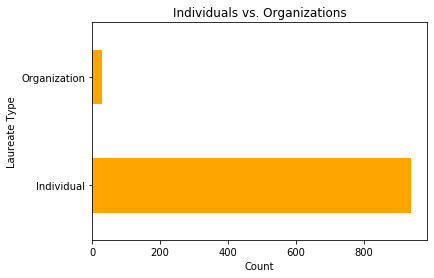

In [499]:
#What is the ratio of individuals to organizations to win a Nobel Prize ?!

df.groupby(['Laureate Type'])['Year'].count().plot(kind='barh', color="orange")
plt.ylabel("Laureate Type")
plt.xlabel("Count")
plt.title("Individuals vs. Organizations")
plt.show()

In [500]:
#Another Question: Who are the youngest and oldest winners in our dataset

min_age = 0
max_age = 0
min_name = ""
max_name = ""

#Filtering our dataset to contain only individuals
individual_winners = df[df['Laureate Type']=="Individual"]


for i in range(individual_winners.shape[0]):
    birth_date = individual_winners.iloc[i]['Birth Date']
    winning_year = individual_winners.iloc[i]['Year']
    name = individual_winners.iloc[i]['Full Name']
    if(not ("Before" in str(birth_date))):
        birth_year = int(birth_date.split("-")[0])
        min_name = str(name)
        max_name = str(name)
        min_age = abs(int(winning_year) - int(birth_year))
        max_age = abs(int(winning_year) - int(birth_year))
        break
        
        
for i in range(individual_winners.shape[0]):
    birth_date = individual_winners.iloc[i]['Birth Date']
    winning_year = int(individual_winners.iloc[i]['Year'])
    name = individual_winners.iloc[i]['Full Name']
    if(not ("Before" in str(birth_date))):
        birth_year = int(birth_date.split("-")[0])
        age = abs(int(winning_year) - int(birth_year))
        if(int(age) <= int(min_age)):
            min_age = age
            min_name = str(name)
        elif(int(age) > int(max_age)):
            max_age = age
            max_name = str(name)

print("Oldest Winner Is : " + max_name + " With Age : " + str(max_age))
print("Youngest Winner Is : " + min_name + " With Age : " + str(min_age))

Oldest Winner Is : Leonid Hurwicz With Age : 90
Youngest Winner Is : Malala Yousafzai With Age : 17


In [501]:
#Another Wuestion: What is the average age for winning a Nobel Prize ?!

age = 0
count = 0

#Filtering our dataset to contain only individuals
individual_winners = df[df['Laureate Type']=="Individual"]


for i in range(individual_winners.shape[0]):
    birth_date = individual_winners.iloc[i]['Birth Date']
    winning_year = int(individual_winners.iloc[i]['Year'])
    if(not ("Before" in str(birth_date))):
        birth_year = int(birth_date.split("-")[0])
        age = age + abs(winning_year - birth_year)
        count = count + 1
        
avg_age = age // count


print("The Average Age For Winning A Nobel Prize Is : " + str(avg_age) + " Years Old")

The Average Age For Winning A Nobel Prize Is : 59 Years Old


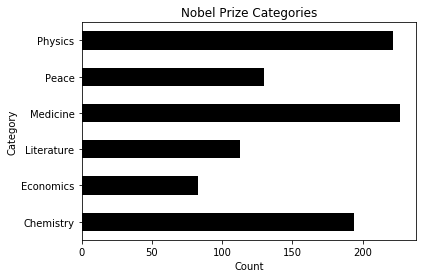

In [502]:
#A Visualization Graph For Categories Of Nobel Prizes

df.groupby(['Category'])['Year'].count().plot(kind='barh', color = "black")
plt.title("Nobel Prize Categories")
plt.ylabel("Category")
plt.xlabel("Count")
plt.show()

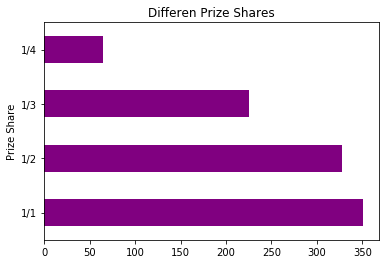

In [503]:
#We can add also add a plot to inspect the different prize shared among the winners
#We can see from the graph that majority prizes are either individual win or shared amon two winners

df.groupby(['Prize Share'])['Year'].count().plot(kind='barh', color="purple")
plt.ylabel("Prize Share")
plt.title("Differen Prize Shares")
plt.show()

In [504]:
#Saving Our Dataset

df.to_csv('CleanData.csv')